In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#Prepare dataframes for the testing.
#---------------------------------------------------------------------


In [3]:
# Upload Dataframes:
startEvtmc = 0
stopEvtmc  = 2000000
qr_mc= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)
startEvtdata = 0
stopEvtdata  = 2000000
qr_data.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016B[0],rn.run2016H[1])
dfmc= qr_mc.getDF()
dfdata=qr_data.getDF()

NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EELowR9
number of events: 7073020
# lead eleMatch    =  6081954
# sublead eleMatch =  5528292
MC Sublead
lead size:  6081954
MC Lead
sublead size:  5528292
Count final dataset
11610246
Apply basic selection
 ptmin  =  25.0 
 ptmax  =  150.0  
 etamin =  -2.5  
 etamax =  2.5  
 phimin =  -3.14  
 phimax =  3.14
Reshuffle events rndm seed  =  12345
Selecting events   [ 0 ,  2000000 ]  out of  11554791
DataFrame size =  2000000
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9
number of events: 15355385
Cou

In [4]:
dfmc   = dfmc  .query('(mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfdata   = dfdata  .query('(mass > 70 and mass < 110)  and (ChIso03 < 5)')
dfmcEB= dfmc.query('-1.444 < ScEta & ScEta <1.444 & (R9> 0.8 & R9 <1.0) ')
dfmcEE= dfmc.query('(ScEta < -1.57 | ScEta >1.57) & (R9> 0.8 & R9 <1.0) ')
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444 & (R9> 0.8 & R9 <1.0) ') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('(ScEta < -1.57 | ScEta >1.57) & (R9> 0.8 & R9 <1.0) ') # ('abs(ScEta)>1.57')
print len(dfmc.index),len(dfdata.index)

1920498 1855493


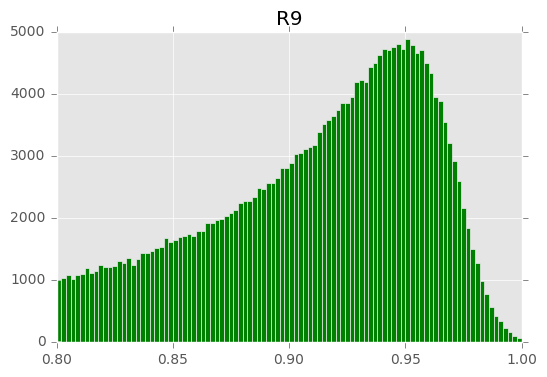

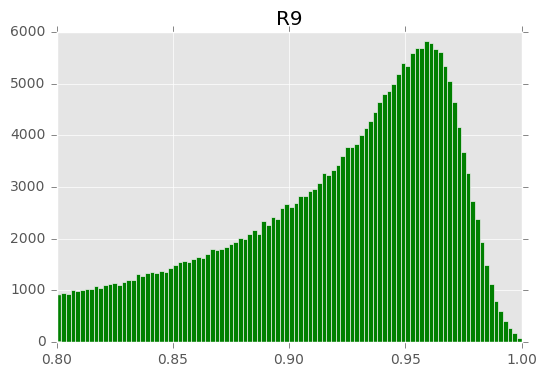

In [5]:
h = dfdataEE.hist('R9', bins=100, alpha = 1, color='g')
h = dfmcEE.hist('R9', bins=100, alpha = 1, color='g')

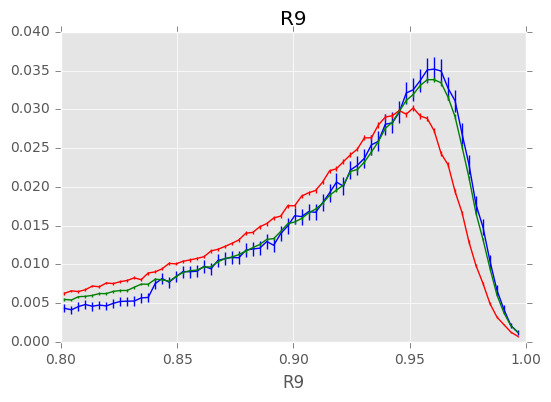

In [7]:
rv=np.arange(0.8,1.,0.003)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
#Do the Ratio wrt the last 
plot.plotHistErr(dfmcEE["R9"], rv, Color="b", Weight=dfmcEE["weight"])
plot.plotHistErr(dfdataEE["R9"], rv, Color="r", Weight=dfdataEE["weight"])
plot.plotHistErr(dfmcEE["R9"], rv, Color="g")
ax.set_title('R9')